In [1]:
import clustering_functions as cf
import os
import pandas as pd

2023-04-24 08:40:23.156113: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-24 08:40:23.300712: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-24 08:40:23.302562: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 08:40:24.538037: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
csv_path = "etl_data/contratistas_df.csv"
result_df = cf.read_partitioned_csv(csv_path)
result_df.head()

,ID_CONTRATISTA,RAZON_SOCIAL_CONTRATISTA,num_contratos,suma_valor_total_contrato,promedio_valor_total_contrato,num_departamentos,num_estados_proceso,num_clases_proceso,num_tipos_proceso,num_familias,...,INTERVENTORIA,CONCESION,ASOCIACION PUBLICO PRIVADA,OBRA,DECREELAW0922017,VENTA MUEBLES,numero_de_multas,suma_valor_sancion,promedio_valor_sancion,meses_desde_ultima_multa
0,0,CONSORCIO INTERGASF2,1,349999999,3.500000e+08,1,1,1,1,1,...,1,0,0,0,0,0,NaN,NaN,NaN,NaN
1,0,CONSORCIO PYG RESTAURADORES,2,212287670,1.061438e+08,1,1,1,1,1,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,0,INTECOMEDOR CONSORCIO,1,228971000,2.289710e+08,1,1,1,1,1,...,1,0,0,0,0,0,NaN,NaN,NaN,NaN
3,0,INTERMUSEO VALLEDUPAR UNION TEMPORAL,1,7640611322,7.640611e+09,1,1,1,1,1,...,1,0,0,0,0,0,NaN,NaN,NaN,NaN
4,0,UNION TEMPORAL ESCOLAR PUERTO LOPEZ 2021,1,244657110,2.446571e+08,1,1,1,1,1,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
cleaned_df = cf.replace_nulls(result_df)
cleaned_df.head()

,ID_CONTRATISTA,RAZON_SOCIAL_CONTRATISTA,num_contratos,suma_valor_total_contrato,promedio_valor_total_contrato,num_departamentos,num_estados_proceso,num_clases_proceso,num_tipos_proceso,num_familias,...,INTERVENTORIA,CONCESION,ASOCIACION PUBLICO PRIVADA,OBRA,DECREELAW0922017,VENTA MUEBLES,numero_de_multas,suma_valor_sancion,promedio_valor_sancion,meses_desde_ultima_multa
0,0,CONSORCIO INTERGASF2,1,349999999,3.500000e+08,1,1,1,1,1,...,1,0,0,0,0,0,0.0,0.0,0.0,99999999.0
1,0,CONSORCIO PYG RESTAURADORES,2,212287670,1.061438e+08,1,1,1,1,1,...,0,0,0,0,0,0,0.0,0.0,0.0,99999999.0
2,0,INTECOMEDOR CONSORCIO,1,228971000,2.289710e+08,1,1,1,1,1,...,1,0,0,0,0,0,0.0,0.0,0.0,99999999.0
3,0,INTERMUSEO VALLEDUPAR UNION TEMPORAL,1,7640611322,7.640611e+09,1,1,1,1,1,...,1,0,0,0,0,0,0.0,0.0,0.0,99999999.0
4,0,UNION TEMPORAL ESCOLAR PUERTO LOPEZ 2021,1,244657110,2.446571e+08,1,1,1,1,1,...,0,0,0,0,0,0,0.0,0.0,0.0,99999999.0


In [6]:
cleaned_df.index = cleaned_df['ID_CONTRATISTA']
cleaned_df = cleaned_df.drop(columns=['ID_CONTRATISTA'])
cleaned_df.head()

,RAZON_SOCIAL_CONTRATISTA,num_contratos,suma_valor_total_contrato,promedio_valor_total_contrato,num_departamentos,num_estados_proceso,num_clases_proceso,num_tipos_proceso,num_familias,num_clases,...,INTERVENTORIA,CONCESION,ASOCIACION PUBLICO PRIVADA,OBRA,DECREELAW0922017,VENTA MUEBLES,numero_de_multas,suma_valor_sancion,promedio_valor_sancion,meses_desde_ultima_multa
ID_CONTRATISTA,,,,,,,,,,,,,,,,,,,,,
0,CONSORCIO INTERGASF2,1,349999999,3.500000e+08,1,1,1,1,1,1,...,1,0,0,0,0,0,0.0,0.0,0.0,99999999.0
0,CONSORCIO PYG RESTAURADORES,2,212287670,1.061438e+08,1,1,1,1,1,1,...,0,0,0,0,0,0,0.0,0.0,0.0,99999999.0
0,INTECOMEDOR CONSORCIO,1,228971000,2.289710e+08,1,1,1,1,1,1,...,1,0,0,0,0,0,0.0,0.0,0.0,99999999.0
0,INTERMUSEO VALLEDUPAR UNION TEMPORAL,1,7640611322,7.640611e+09,1,1,1,1,1,1,...,1,0,0,0,0,0,0.0,0.0,0.0,99999999.0
0,UNION TEMPORAL ESCOLAR PUERTO LOPEZ 2021,1,244657110,2.446571e+08,1,1,1,1,1,1,...,0,0,0,0,0,0,0.0,0.0,0.0,99999999.0


In [7]:
cleaned_df_nombre_entidad = cleaned_df[['RAZON_SOCIAL_CONTRATISTA']]
cleaned_df_nombre_entidad.head()

cleaned_df.drop(columns=['RAZON_SOCIAL_CONTRATISTA'], inplace=True)
cleaned_df.head()

,num_contratos,suma_valor_total_contrato,promedio_valor_total_contrato,num_departamentos,num_estados_proceso,num_clases_proceso,num_tipos_proceso,num_familias,num_clases,meses_desde_ultimo_contrato,...,INTERVENTORIA,CONCESION,ASOCIACION PUBLICO PRIVADA,OBRA,DECREELAW0922017,VENTA MUEBLES,numero_de_multas,suma_valor_sancion,promedio_valor_sancion,meses_desde_ultima_multa
ID_CONTRATISTA,,,,,,,,,,,,,,,,,,,,,
0,1,349999999,3.500000e+08,1,1,1,1,1,1,24,...,1,0,0,0,0,0,0.0,0.0,0.0,99999999.0
0,2,212287670,1.061438e+08,1,1,1,1,1,1,20,...,0,0,0,0,0,0,0.0,0.0,0.0,99999999.0
0,1,228971000,2.289710e+08,1,1,1,1,1,1,22,...,1,0,0,0,0,0,0.0,0.0,0.0,99999999.0
0,1,7640611322,7.640611e+09,1,1,1,1,1,1,22,...,1,0,0,0,0,0,0.0,0.0,0.0,99999999.0
0,1,244657110,2.446571e+08,1,1,1,1,1,1,20,...,0,0,0,0,0,0,0.0,0.0,0.0,99999999.0


In [8]:
scaled_df = cf.apply_standard_scaler(cleaned_df)
scaled_df.index = cleaned_df_nombre_entidad.index
scaled_df.head()

,num_contratos,suma_valor_total_contrato,promedio_valor_total_contrato,num_departamentos,num_estados_proceso,num_clases_proceso,num_tipos_proceso,num_familias,num_clases,meses_desde_ultimo_contrato,...,INTERVENTORIA,CONCESION,ASOCIACION PUBLICO PRIVADA,OBRA,DECREELAW0922017,VENTA MUEBLES,numero_de_multas,suma_valor_sancion,promedio_valor_sancion,meses_desde_ultima_multa
ID_CONTRATISTA,,,,,,,,,,,,,,,,,,,,,
0,-0.252188,0.026448,0.083576,-0.103836,-0.338837,-0.07043,-0.12726,-0.181639,-0.181639,0.325437,...,22.642004,-0.007062,-0.006747,-0.051378,-0.153112,-0.007062,-0.015296,-0.004001,-0.003755,0.016957
0,0.416216,0.006956,0.009123,-0.103836,-0.338837,-0.07043,-0.12726,-0.181639,-0.181639,-1.072545,...,-0.027188,-0.007062,-0.006747,-0.051378,-0.153112,-0.007062,-0.015296,-0.004001,-0.003755,0.016957
0,-0.252188,0.009318,0.046624,-0.103836,-0.338837,-0.07043,-0.12726,-0.181639,-0.181639,-0.373554,...,22.642004,-0.007062,-0.006747,-0.051378,-0.153112,-0.007062,-0.015296,-0.004001,-0.003755,0.016957
0,-0.252188,1.058352,2.309516,-0.103836,-0.338837,-0.07043,-0.12726,-0.181639,-0.181639,-0.373554,...,22.642004,-0.007062,-0.006747,-0.051378,-0.153112,-0.007062,-0.015296,-0.004001,-0.003755,0.016957
0,-0.252188,0.011538,0.051413,-0.103836,-0.338837,-0.07043,-0.12726,-0.181639,-0.181639,-1.072545,...,-0.027188,-0.007062,-0.006747,-0.051378,-0.153112,-0.007062,-0.015296,-0.004001,-0.003755,0.016957


/home/elchristog/.local/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/elchristog/.local/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:339: UserWarning: Exited at iteration 2000 with accuracies 
[8.14951692e-13 4.08011667e-06 2.55834179e-06 1.76918145e-06]
not reaching the requested tolerance 1e-15.
Use iteration 1878 instead with accuracy 
8.991051473857694e-07.

  _, diffusion_map = lobpcg(laplacian, X, tol=1e-15,
/home/elchristog/.local/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:339: UserWarning: Exited postprocessing with accuracies 
[2.66287195e-13 1.00726975e-06 1.34641171e-06 1.24273862e-06]
not reaching the requested tolerance 1e-15.
  _, diffusion_map = lobpcg(laplacian, X, tol=1e-15,
/home/elchristog/.local/lib/python3.9/site-packages/umap/spectr

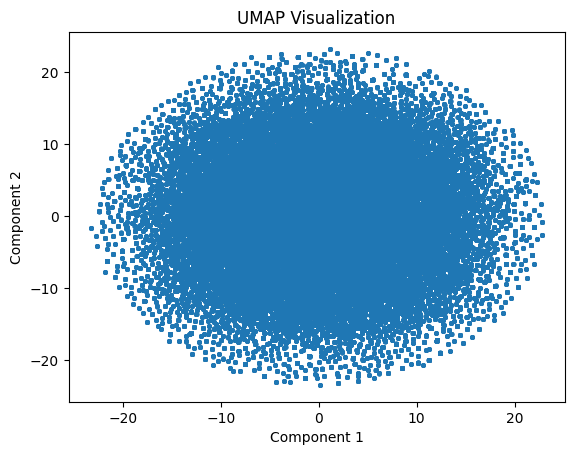

UMAP components:
 [[  7.771698     4.2202663 ]
 [  0.87260836   1.017358  ]
 [  7.774042     4.211439  ]
 ...
 [  0.35749784  10.143775  ]
 [-12.109421     9.952916  ]
 [ -1.8606122   11.02508   ]]

Cumulative explained variance:
 [0.49133188 1.        ]


In [10]:
n_components = 2
umap_data, explained_variance_ratio_cumsum = cf.apply_umap(scaled_df, n_components)

print("UMAP components:\n", umap_data)
print("\nCumulative explained variance:\n", explained_variance_ratio_cumsum)


In [13]:
umap_df = pd.DataFrame(umap_data, columns=['UMAP1', 'UMAP2'])
umap_df.to_csv(os.path.join("clustering_data", "umap_data.csv"), index=False)

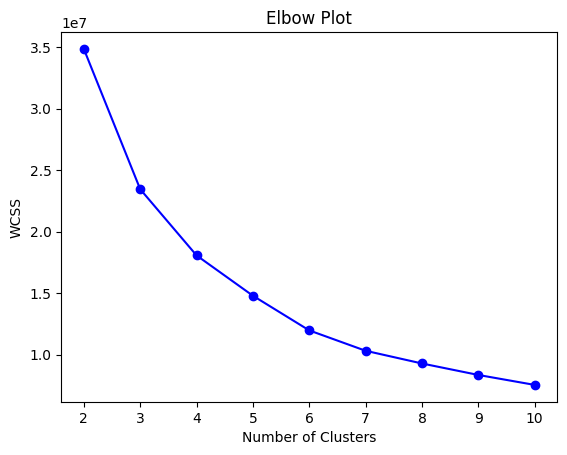

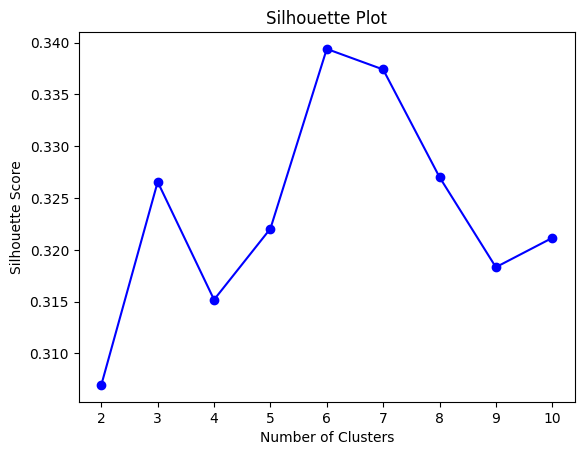

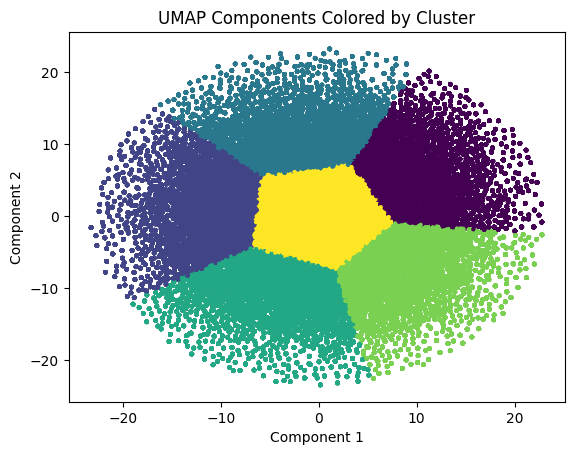

Optimal number of clusters: 6
Cluster labels: [0 5 0 ... 2 1 2]


In [14]:
optimal_clusters, labels = cf.find_optimal_clusters(umap_data)

print("Optimal number of clusters:", optimal_clusters)
print("Cluster labels:", labels)


In [17]:
cleaned_df['cluster'] = labels
cleaned_df['NOMBRE_ENTIDAD'] = cleaned_df_nombre_entidad
cleaned_df.head()

,num_contratos,suma_valor_total_contrato,promedio_valor_total_contrato,num_departamentos,num_estados_proceso,num_clases_proceso,num_tipos_proceso,num_familias,num_clases,meses_desde_ultimo_contrato,...,ASOCIACION PUBLICO PRIVADA,OBRA,DECREELAW0922017,VENTA MUEBLES,numero_de_multas,suma_valor_sancion,promedio_valor_sancion,meses_desde_ultima_multa,cluster,NOMBRE_ENTIDAD
ID_CONTRATISTA,,,,,,,,,,,,,,,,,,,,,
0,1,349999999,3.500000e+08,1,1,1,1,1,1,24,...,0,0,0,0,0.0,0.0,0.0,99999999.0,0,CONSORCIO INTERGASF2
0,2,212287670,1.061438e+08,1,1,1,1,1,1,20,...,0,0,0,0,0.0,0.0,0.0,99999999.0,5,CONSORCIO PYG RESTAURADORES
0,1,228971000,2.289710e+08,1,1,1,1,1,1,22,...,0,0,0,0,0.0,0.0,0.0,99999999.0,0,INTECOMEDOR CONSORCIO
0,1,7640611322,7.640611e+09,1,1,1,1,1,1,22,...,0,0,0,0,0.0,0.0,0.0,99999999.0,0,INTERMUSEO VALLEDUPAR UNION TEMPORAL
0,1,244657110,2.446571e+08,1,1,1,1,1,1,20,...,0,0,0,0,0.0,0.0,0.0,99999999.0,5,UNION TEMPORAL ESCOLAR PUERTO LOPEZ 2021


In [24]:
cleaned_df["ID_CONTRATISTA"] = cleaned_df.index
cleaned_df.to_csv(os.path.join("clustering_data", "contratistas_clustered_df.csv"), index=False)

In [25]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

cluster_centroids = cf.get_cluster_centroids(cleaned_df)
print(cluster_centroids)

         num_contratos  suma_valor_total_contrato  promedio_valor_total_contrato  num_departamentos  num_estados_proceso  num_clases_proceso  num_tipos_proceso  num_familias  num_clases  meses_desde_ultimo_contrato  SANTANDER    VAUPES    NARIÑO   CAQUETA  NO DEFINIDO  CASANARE      META  AMAZONAS  GUAVIARE     CAUCA   VICHADA  ANTIOQUIA   QUINDIO     CHOCO  SAN ANDRES PROVIDENCIA Y SANTA CATALINA    CALDAS    BOYACA  VALLE DEL CAUCA  CUNDINAMARCA  LA GUAJIRA    TOLIMA    ARAUCA  NORTE DE SANTANDER    BOGOTA     HUILA     SUCRE  ATLANTICO   BOLIVAR  RISARALDA  PUTUMAYO  MAGDALENA   GUAINIA   CORDOBA     CESAR  TERMINADO    ACTIVO  BORRADOR    CEDIDO  MODIFICADO  EN EJECUCION  ENVIADO PROVEEDOR  SUSPENDIDO   CERRADO  CONTRATACION DIRECTA      null  CONCURSO DE MERITOS  CONTRATACION MINIMA CUANTIA  LICITACION OBRA PUBLICA   SUBASTA  LICITACION PUBLICA  REGIMEN ESPECIAL  SELECCION ABREVIADA DE MENOR CUANTIA  EMPRESTITO   SEGUROS  CONSULTORIA  PRESTACION DE SERVICIOS  ACUERDO MARCO DE PREC

- Cluster 0: "Contratos Pequeños y Multas Medianas"

Este cluster se caracteriza por tener un número de contratos promedio ligeramente mayor (1.238804) que otros clusters.
El valor promedio de sanciones es más alto que el promedio, pero no el más alto entre los clusters.
La cantidad y el valor total de contratos son relativamente bajos en comparación con otros clusters.
Los meses desde la última multa y contrato son similares a otros clusters.
Predomina el tipo de contrato "Contratación Directa".

- Cluster 1: "Contratos Medianos y Multas Bajas"

La cantidad promedio de contratos en este cluster es ligeramente menor (1.215268) en comparación con otros clusters.
El valor promedio de las sanciones es el más bajo entre los clusters.
La cantidad y el valor total de contratos son moderados en comparación con otros clusters.
Los meses desde la última multa y contrato son similares a otros clusters.
Predomina el tipo de contrato "Contratación Directa".

- Cluster 2: "Contratos Bajos y Multas Altas"

La cantidad promedio de contratos en este cluster es menor (1.210177) en comparación con otros clusters.
El valor promedio de las sanciones es el más alto entre los clusters.
La cantidad y el valor total de contratos son relativamente bajos en comparación con otros clusters.
Los meses desde la última multa y contrato son similares a otros clusters.
Predomina el tipo de contrato "Contratación Directa".

- Cluster 3: "Contratos Bajos y Multas Moderadas"

La cantidad promedio de contratos en este cluster es similar al cluster 2 (1.210355).
El valor promedio de las sanciones es moderado en comparación con otros clusters.
La cantidad y el valor total de contratos son relativamente bajos en comparación con otros clusters.
Los meses desde la última multa y contrato son similares a otros clusters.
Predomina el tipo de contrato "Contratación Directa".

- Cluster 4: "Contratos Bajos y Multas Medianas"

La cantidad promedio de contratos en este cluster es menor (1.187369) en comparación con otros clusters.
El valor promedio de las sanciones es moderado en comparación con otros clusters.
La cantidad y el valor total de contratos son relativamente bajos en comparación con otros clusters.
Los meses desde la última multa y contrato son similares a otros clusters.
Predomina el tipo de contrato "Contratación Directa".

- Cluster 5: "Contratos Altos y Multas Bajas"

La cantidad promedio de contratos en este cluster es mayor (1.260600) en comparación con otros clusters.
El valor promedio de las sanciones es más bajo que el promedio, pero no el más bajo entre los clusters.
La cantidad y el valor total de contratos son relativamente altos en comparación con otros clusters.
Los meses desde la última multa y contrato son similares a otros clusters.
Predomina el tipo de contrato "

- Cluster 6_ "Contratos gubernamentales de valor medio y pocas sanciones"

Número promedio de contratos: 1.23
Suma promedio del valor total del contrato: 37,256,978
Promedio del valor total del contrato: 31,844,898
Número promedio de departamentos involucrados: 1
Meses desde el último contrato: 23.1
Meses desde la última multa: 22.9
Número promedio de multas: 1.8
Suma promedio del valor de las sanciones: 2,381
Promedio del valor de las sanciones: 9,995,000,000
Este cluster se caracteriza por tener contratos gubernamentales de valor medio y pocas sanciones. La mayoría de los contratos están en Bogotá, Cundinamarca y Antioquia.

In [26]:
total_num_contratos = cluster_centroids['num_contratos'].sum()
total_promedio_valor_total_contrato = cluster_centroids['promedio_valor_total_contrato'].sum()
total_numero_de_multas = cluster_centroids['numero_de_multas'].sum()
total_promedio_valor_sancion = cluster_centroids['promedio_valor_sancion'].sum()

cluster_centroids['participacion_num_contratos'] = (cluster_centroids['num_contratos'] / total_num_contratos)
cluster_centroids['participacion_promedio_valor_total_contrato'] = (cluster_centroids['promedio_valor_total_contrato'] / total_promedio_valor_total_contrato)
cluster_centroids['participacion_numero_de_multas'] = (cluster_centroids['numero_de_multas'] / total_numero_de_multas)
cluster_centroids['participacion_promedio_valor_sancion'] = (cluster_centroids['promedio_valor_sancion'] / total_promedio_valor_sancion)
cluster_centroids['indice_de_transparencia'] = cluster_centroids['participacion_num_contratos'] * (1-cluster_centroids['participacion_numero_de_multas'])

print(cluster_centroids[['participacion_num_contratos', 'participacion_promedio_valor_total_contrato', 'participacion_numero_de_multas', 'participacion_promedio_valor_sancion', 'indice_de_transparencia']])


         participacion_num_contratos  participacion_promedio_valor_total_contrato  participacion_numero_de_multas  participacion_promedio_valor_sancion  indice_de_transparencia
cluster                                                                                                                                                                         
0                           0.155756                                     0.088104                        0.085097                              0.018369                 0.142501
1                           0.152796                                     0.082520                        0.492893                              0.597270                 0.077484
2                           0.152156                                     0.081679                        0.084659                              0.307011                 0.139275
3                           0.152179                                     0.085349                        0.046895  

In [27]:
cluster_centroids["cluster"] = cluster_centroids.index
cluster_centroids.to_csv("clustering_data/indice_transparencia.csv")

In [16]:
# sigue indice de transparencia del cluster, segun rfm contratos y multas, castiga por estar en el cluster
# sigue a nivel contrato, si el contrato es anomalo dentro del cluster mas puntos de castigo
# y herfindal hisrshman, asi cluster ideal es el que reparte equitativo, no hay multas y se asigna mucho contrato -- pesimo cluster aquel en el que se asigna mucho y hay mucha multa y se es inequitativo
# final indice de transparencia y dashboard (no se si hacer modelo predictivo para palancas, creo que no)